# Uber

Se solicita, a partir del dataset entregado, obtener el mes en el que se recorrio la mayor cantidad de millas. Para esto se considera la fecha de inicio de cada viaje el determinante de a que mes pertenecio el recorrido. Luego de esto se obtienen subdatas del dataset original los cuales contienen los datos solo para cierto mes. Se compara el valor de la suma de millas de cada subdata para determinar el mes que recorrio la mayor cantidad.
En el dataset se modifican los nombres de algunas columnas para dar un manejo mas simple a los datos en ella.




In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
dataset = pd.read_csv('uber.csv')
dataset['fechaini'] = pd.to_datetime(dataset['fechaini'])
max=0
for i in range (1,13):
    subdata = dataset[['fechaini', 'millas']].query('fechaini.dt.month=='+str(i)) 
    millastotal=subdata['millas'].sum()
    if millastotal>max:
        max=millastotal
        mes=i
print(mes)
        
    
    
    

10


Se obtiene de esta forma que el mes en el que se recorrieron mas millas fue Octubre.

A partir del dataset original, se realiza la suma de la columna millas para determinar las millas totales recorridas en el año. Con esto, segun la cantidad de filas, se determina el largo promedio de un viaje. El valor total es dividido por la cantidad de meses para obtener el promedio mensual y por la cantidad de semanas para obtener el promedio semanal.

In [98]:
dpromedio=dataset['millas'].sum()/len(dataset)
dmes=dataset['millas'].sum()/12
dsem=dataset['millas'].sum()/52

print("El largo promedio de un viaje a lo largo de un año fue: " + str(distanciapromedio)+" millas")
print("La distancia promedio recorrida por mes fue: "+ str(dmes)+" millas")
print("La distacia promedio recorrida por semana fue: "+ str(dsem)+" millas")


El largo promedio de un viaje a lo largo de un año fue: 10.566839826839827 millas
La distancia promedio recorrida por mes fue: 1017.0583333333334 millas
La distacia promedio recorrida por semana fue: 234.70576923076925 millas


Para responder a que mes corresponde el que tuvo viajes mas irregulares se obtiene la desviacion estandar de cada mes y se elije el mes que posea el mayor valor.

In [99]:
desviacion_estandar=dataset['millas'].std()
max=0
for i in range (1,13):
    subdata = dataset[['fechaini', 'millas']].query('fechaini.dt.month=='+str(i)) 
    desviacion=subdata['millas'].std()
    if desviacion>max:
        max=desviacion
        mes=i
print(mes)

3


Se obtiene de esta forma que el mes con viajes mas irregulares fue marzo, por lo que sobre este se obtendran sus cuartiles.

In [100]:
subdata = dataset[['fechaini', 'millas']].query('fechaini.dt.month==3')
primer_cuartil=subdata.quantile(.25)
segundo_cuartil=subdata.quantile(.5)
tercer_cuartil=subdata.quantile(.75)

print("Primer Cuartil:\n "+str(primer_cuartil))
print("\nSegundo Cuartil:\n "+str(segundo_cuartil))
print("\nTercer Cuartil:\n "+str(tercer_cuartil))



Primer Cuartil:
 millas    2.1
Name: 0.25, dtype: float64

Segundo Cuartil:
 millas    6.6
Name: 0.5, dtype: float64

Tercer Cuartil:
 millas    10.9
Name: 0.75, dtype: float64


Se logra observar a partir del rango intercuartil que la dispersión de los datos es alta, dada la diferencia entre cada cuartil. Se logra observar ademas que de el 75% de los datos esta bajo el promedio de viaje diario y que el 25% de los viajes resultan ser viajes muy cortos.

Se realiza un boxplot de los meses: enero, mayo, septiembre, diciembre.

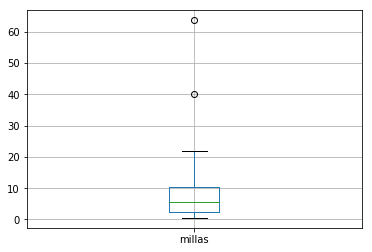

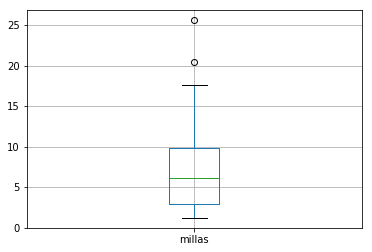

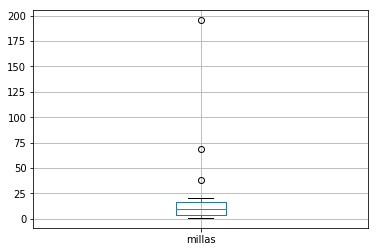

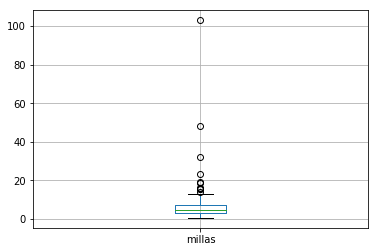

In [101]:
subdata = dataset[['fechaini', 'millas']].query('fechaini.dt.month==1')
plt.figure()
subdata.boxplot(figsize=(15, 5))
plt.show()
subdata = dataset[['fechaini', 'millas']].query('fechaini.dt.month==5')
plt.figure()
subdata.boxplot(figsize=(15, 5))
plt.show()
subdata = dataset[['fechaini', 'millas']].query('fechaini.dt.month==9')
plt.figure()
subdata.boxplot(figsize=(15, 5))
plt.show()
subdata = dataset[['fechaini', 'millas']].query('fechaini.dt.month==12')
plt.figure()
subdata.boxplot(figsize=(15, 5))
plt.show()


A partir de los boxplots se puede observar que en diciembre se presenta una mayor cantidad de _**outliers**_ mientras que en los otros meses solo se presentan _**outliers**_ puntuales. Se logra apreciar ademas que la mayoria de los _**outliers**_ en diciembre se presenta justo por sobre del bigote superior y que los cuartiles para cada mes se mantienen dentro del mismo rango de millas. Se tiene ademas de lo realizado anteriormente, que el promedio de cada viaje durante el transcurso del año es de 10,56 siendo este cercano al tercer cuartil en cada uno de los meses. Esto indica que el promedio se ve afectado en gran medida por los _**outliers**_ siendo asi una medida estadística poco representativa de los viajes realizados a lo largo del año.

Se procede a calcular la ganancia total utilizando la siguiente función de costo:
$$
f(x)= \left\{ \begin{array}{lcc}
             12 &   si  & x \leq 3.0 \\
             \\ 5x &  si & 3.0 < x < 20.0 \\
             \\ 100 + 0.35\cdot x &  si  & x \geq 20
             \end{array}
   \right.
$$




In [103]:
ganancia=0
for i in range (0, len(dataset)):
    millas=dataset['millas'][i]
    if millas<=3.0:
        ganancia=ganancia+12
    if millas<20 and millas>3.0:
        ganancia=ganancia+(5*millas)
    if millas>=20:
        ganancia=ganancia+100+(0.35*millas)
print("La ganancia total del uber fue "+str(ganancia))
    
    

La ganancia total del uber fue 45847.140000000014
